#### Welcome to assingment 2 of Machine Learning Course 5DV194! 
Your basic task is to build a classifier uisng neural network on the Movies dataset.

#### Goals of assignment 2:
Goal-1: Build and explore the natural lanuage processing model (i.e., word embbeding) for word representation. <br> 
Goal-2: Build a recurrent neural network (RNN) for sentiment classification (i.e., positive or negative) using word embeddings. <br>
Goal-3: Build a recurrent neural network (CNN) for sentiment classification (i.e., positive or negative) using word embeddings.

#### Deadline of assignment 2:
March 4, 2019 (23:59:59 Stockholm time)

#### Technologies to apply in assignment 2
Natural Language Process model (i.e., Word embedding) 
Machine Learning algorithm (i.e., Recurrent Neural Network)
Machine Learning algorithm (i.e., CNN)

#### Dataset
Work on IMDB review dataset, a benchmark dataset for binary sentiment classification (positive or negative) on movies.
http://ai.stanford.edu/~amaas//data/sentiment/

If you want to know more about the dataset (BUT not mandatory), see this paper: http://ai.stanford.edu/~ang/papers/acl11-WordVectorsSentimentAnalysis.pdf


#### Instruction
Overall there are 8 tasks (steps) in this assingment.  To fulfill each task, you will find several TODO sections, which requires you to add codes.  Anyway, just follow this file (WordEmbedding_Student.ipynb) to run the GIVEN codes, and add your implemention (in TODO section) to accomplish all tasks. It's also important to know that you're **not allowed** to import any other libraries. Only existing 'imported libraries' in each file are allowed.

#### Evaluation points distribution (200 points in total):
Task 1. Output the number of data samples (5pt) <br>
Task 2: Recover the raw form of one sample (10pt) <br>
Task 3: Implement "window based co-occurrence matrix" word representation approach. (25pt) <br>
Task 4: Output the most 5 similar words of 'he', 'she', and 'girl'? (20pt) <br>
Task 5: Find similar relationship of given input words. (30pt) <br>
Task 6: Build an LSTM model to classify positive/negative imdb reviews using the above embedding model. (60pt) <br>
Task 7: Build an CNN model to classify positive/negative imdb reviews using the above embedding model. (20pt) <br>
Task 8: Answer for several question regarding your built neural network model (30pt) <br>

<br>**Note**: All of your answers, codes, and trained models are validated <span style="color:red"> <em>automatically</em></span>. So please make sure you are following all instructions properly. We will have a closer look into your problem but your grade will not be changed since it depends on your submitted codes/files. <br>
<span style="color:red"> <em>INFORMATION:</em></span> You're not allowed to publish this code to any other third-party.

### 0. Preparation
The following a few steps is to make sure (1) your python environment is well prepared and (2) output files are well-organised.

#### Task 0: install packages
1) Read instruction in **build_env.note** to install all required packages (tip: if your conda does not work, 'pip install' also applies.)
2) Run the following three code blocks to make sure you're ready to go.

In [1]:
%load_ext autoreload
%autoreload 2
USE_G_COLAB = False
if USE_G_COLAB:
  from google.colab import drive
  drive.mount('/content/drive')

In [2]:
if USE_G_COLAB:
  root_dir = "/content/drive/My Drive/MLCourse.2019/Assignment2/Student_Ver/"
  root_dir_to_test = "/content/drive/My\ Drive/MLCourse.2019/Assignment2/Student_Ver/"
  # Confirm the directory is accessible. If the directory is not correct, change it.
  !ls $root_dir_to_test

In [3]:
import numpy as np
from random import randint
import keras, tensorflow, numpy, gensim, h5py, nltk, matplotlib, pandas, seaborn, sklearn

Using TensorFlow backend.


In [4]:
# This part to show what version you're using for each package. 
# Even this .ipynb should work with the latest version of all packages up to Feb.2018
# but, just in case you have a problem, 
# try to use the correct version listed in requirements.txt.
print np.__version__
print tensorflow.__version__
print keras.__version__
print h5py.__version__
print sklearn.__version__
print matplotlib.__version__
print pandas.__version__
print nltk.__version__
print seaborn.__version__

1.15.4
1.12.0
2.2.4
2.8.0
0.20.1
2.2.3
0.23.4
3.4
0.9.0


In [5]:
random_id = randint(3,7000)
answers_out = {}

### 1. Load and study the IMDB dataset

In [6]:
# Load dataset, 17MB
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data('./imdb.npz', 
                                                     num_words=5000, # get 5000 words
                                                     skip_top = 0,   # No skipping
                                                     maxlen=0,       # No maximum length
                                                     start_char=1,   # starting char
                                                     oov_char=2,     # out-of-vocabulary
                                                     index_from=3)   # real index

#### Task 1. Output the number of data samples we have (5 pt)
Hint/suggestion: Type X_train.shape and run it.

In [7]:
#TODO: Type your code here
X_train.shape

(25000,)

In [8]:
answers_out['#sample'] = -25000 # TODO: replace -1 by your answer above

In [9]:
# Get index of all vocabulary
vocab_idx = imdb.get_word_index()
# Let see how one represented document looks like
print X_train[random_id]

[1, 2, 2021, 2831, 9, 35, 284, 37, 2, 6, 109, 29, 9, 2, 8, 297, 159, 29, 166, 6, 2, 2831, 9, 6, 2, 2, 18, 14, 22, 40, 29, 16, 18, 1953, 717, 2, 5, 29, 9, 24, 64, 867, 21, 29, 214, 6, 580, 8, 653, 27, 1459, 7, 395, 6, 109, 19, 2, 3764, 5, 2, 261, 50, 26, 57, 2, 11, 113, 18, 259, 14, 408, 35, 284, 6, 87, 1434, 8, 297, 275, 42, 955, 105, 15, 759, 46, 11, 661, 8, 798, 397, 2, 5, 12, 215, 30, 301, 15, 2, 47, 2, 42, 340, 2262, 6, 2681, 612, 7, 116, 4076, 10, 10, 14, 9, 6, 364, 352, 22, 15, 2789, 16, 93, 11, 6, 58, 2, 7, 64, 107, 2485, 12, 9, 6, 22, 15, 9, 73, 526, 5, 398, 34, 2782, 2, 4, 1622, 3038, 2471, 2, 2, 18, 4, 598, 956, 5, 4, 1622, 1525, 270, 4, 1163, 5, 2852, 18, 4, 22, 4, 802, 9, 1257, 8, 52, 21, 6, 117, 2683, 10, 10, 2, 16, 4, 2, 11, 397, 2831, 8, 81, 14, 22, 137, 4, 284, 16, 11, 200, 22, 3451, 10, 10, 50, 9, 6, 52, 1175, 200, 2831, 5, 2, 2, 6, 1875, 524, 5, 14, 2013, 35, 1134, 807, 200, 257, 7, 4, 177, 1066, 37, 26, 2, 5, 216, 39, 275, 2, 4, 22, 82, 2, 35, 1897, 200, 84, 37, 24, 

#### Task 2: Recover the raw form of one sample (10 pt)
As shown above, the datasets index text documents in numerics. We need to build a reversed index to convert the index-represented document to the raw form. <br>
Your task: retrieve original form of training samples (See TODO in the following part).

In [10]:
# Let see type of vocab_idx. The structure should be a dictionary {word:index}
print ("Type of vocab_idx = %s"%type(vocab_idx))
# We need a reversed dictionary {index:word} to restore a sample review.
rev_idx = {v+3:k for k,v in vocab_idx.items()}
rev_idx[0] = '<padding_word>'
rev_idx[1] = '<start_word>'
rev_idx[2] = '<oov_word>'
rev_idx[3] = '<unk_word>'
print ("Size of vocab = %d"%len(vocab_idx.items()))

Type of vocab_idx = <type 'dict'>
Size of vocab = 88584


In [11]:
def retrieve_sample(doc_id, rev_idx, X_train):
    sample_review = ''
    # TODO: implement your solution here
    sample_review = ' '.join([rev_idx[word] for word in X_train[doc_id]])
    
    # End of implementation
    return sample_review
answers_out['sample_doc_{}'.format(random_id)] = retrieve_sample(random_id, rev_idx, X_train)
answers_out['sample_doc_2'] = retrieve_sample(2, rev_idx, X_train)

In [12]:
print random_id
print answers_out['sample_doc_{}'.format(random_id)]
print answers_out['sample_doc_2']

444
<start_word> <oov_word> morgan freeman is an actor who <oov_word> a character he is <oov_word> to play before he makes a <oov_word> freeman is a <oov_word> <oov_word> for this film like he was for driving miss <oov_word> and he is not only believable but he gets a chance to change his image of playing a character with <oov_word> dignity and <oov_word> although there are no <oov_word> in life for anyone this gives an actor a great opportunity to play different or unique characters that stand out in order to avoid getting <oov_word> and it must be said that <oov_word> has <oov_word> or completely ruined a significant number of acting careers br br this is a low budget film that amazingly was made in a time <oov_word> of only two weeks it is a film that is well directed and written by brad <oov_word> the location manager chose <oov_word> <oov_word> for the film's setting and the location helps set the tone and timing for the film the editing is fair to good but a little rough br br <o

### 2. Build an embedding model for word representation 
Information: the python file **w2vec_utils.py** contains all functions we need for word embeddings.  You will be asked to implement the three required functions in it in the following TODO section.

#### Task 3: implement "window based co-occurrence matrix" word representation approach. (25 pt)
TODO: go to **cooccurrence_vector_utils.py** and implement `find_cooccurrencies` function. Don't worry if you have no-idea about this method, you will learn it at the lecture on 21, Feb. Please have a look to the **cooccurrence_vector_utils.py** for more information.

In [16]:
# import `find_cooccurrencies` function in cooccurrence_vector_utils.py
if USE_G_COLAB:
  import os
  execfile(os.path.join(root_dir, "cooccurrence_vector_utils.py"))
else:
  from cooccurrence_vector_utils import find_cooccurrencies

In [17]:
docs = [answers_out['sample_doc_{}'.format(random_id)], answers_out['sample_doc_2']]
X, vocab_list = find_cooccurrencies(docs, window_size=3)
answers_out['cooccurrencies_X'] = X
answers_out['cooccurrencies_vocab_list'] = vocab_list
print len(X)

233


Populating the interactive namespace from numpy and matplotlib


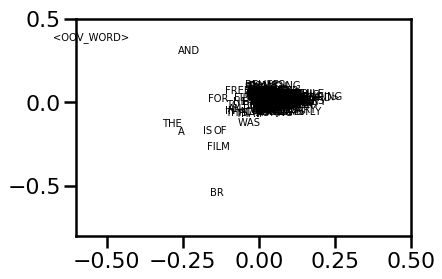

In [97]:
# Visualize SVD
%pylab inline
la = np.linalg
U, S, Vh = la.svd(X, full_matrices=False)
plt.axis([-0.6,0.5,-0.8,0.5])
for i in xrange(len(vocab_list)):
    plt.text(U[i,0], U[i,1], vocab_list[i])

#### TODO: Implement your functions in w2vec_utils and import it here.

In [184]:
if USE_G_COLAB:
  import os
  execfile(os.path.join(root_dir, "w2vec_utils.py"))
else:
  from w2vec_utils import train_word2vec

embedding_model, embedding_weights = train_word2vec(X_train, rev_idx)

#### Explore the trained embedding model.

In [185]:
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [186]:
all_word_vectors_matrix = embedding_model.wv.vectors

In [187]:
# Training T-SNE might take a while.
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [188]:
import pandas as pd
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[embedding_model.wv.vocab[word].index])
            for word in embedding_model.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [189]:
# Let's see top words in your trained model.
answers_out['w2vec_head'] = points.head(10)
answers_out['w2vec_head']

,word,x,y
0,limited,-10.869082,-30.047235
1,lasted,-38.808899,-26.146168
2,paul,11.347417,59.083126
3,secondly,10.417518,-33.177177
4,saves,-34.663334,30.268488
5,dynamic,-6.753863,-17.161968
6,foul,0.058829,-24.764343
7,chaos,17.739408,-3.680143
8,four,-43.864597,-27.182550
9,woods,-26.734167,17.071062


In [190]:
import seaborn as sns
sns.set_context("poster")

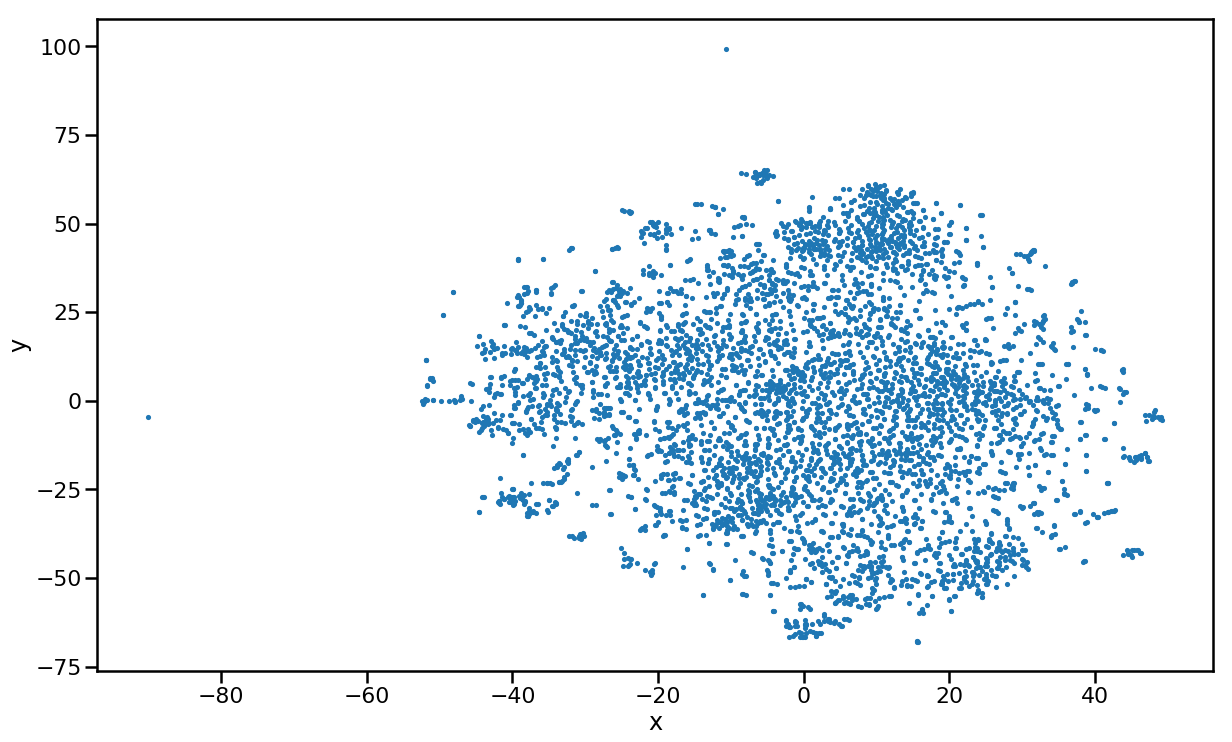

In [191]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [194]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
   
    ax = slice.plot.scatter("x", "y", s=30, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

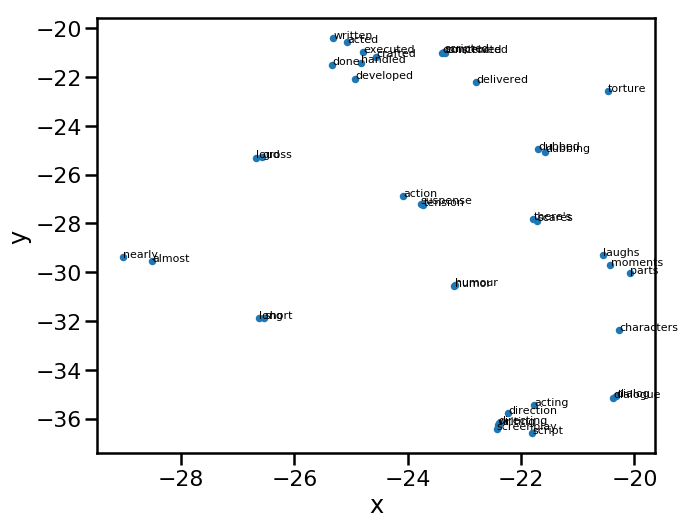

In [195]:
# must will might are stayed close together
plot_region(x_bounds=(-30, -20), y_bounds=(-40, -20))

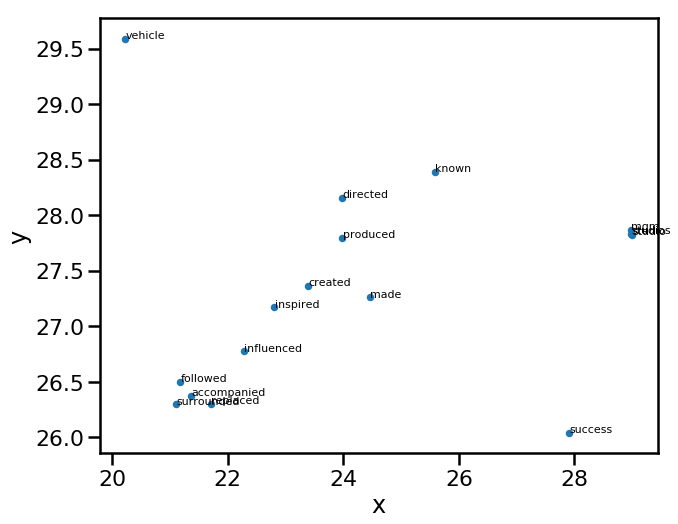

In [196]:
# wonderful excellent stayed close toghether
plot_region(x_bounds=(20, 30), y_bounds=(25, 30))

### Explore semantic similarities between words

#### Task 4: output the most 5 similar words of 'he', 'she', and 'girl'. (20 pt)
Hint: use most_similar function of gensim

In [216]:
# TODO: implement the 'find_most_similar' function in file w2vec_utils.py.
if USE_G_COLAB:
  import os
  execfile(os.path.join(root_dir, "w2vec_utils.py"))
else:
  from w2vec_utils import find_most_similar
# Don't modify this part
answers_out['he'] = find_most_similar('he', embedding_model)
answers_out['she'] = find_most_similar('she', embedding_model)
answers_out['girl'] = find_most_similar('girl', embedding_model)
# End

#### Task 5: Find similar relationship of the given words. (30 pt)

Find similar relationship: E.g., <br>
'king' is related to 'queen', as 'husband' is related to 'wife'.

In [253]:
# TODO: implement the function of 'semantic_math_finder' in file w2vec_utils.py and run the following line of codes.
# hint/suggestion: use most_similar_cosmul function of gensim
if not USE_G_COLAB:
    from w2vec_utils import semantic_math_finder

In [254]:
# Don't modify this
answers_out['girl_cute_man'] = semantic_math_finder("girl", "cute", "man", embedding_model)
answers_out['you_laugh_i'] = semantic_math_finder("you", "laugh", "i", embedding_model)
answers_out['king_man_husband'] = semantic_math_finder("king", "queen", "wife", embedding_model)
# End

[(u'stiller', 0.7829652428627014)]
[(u'laughed', 0.9801632761955261)]
[(u'husband', 1.2475450038909912)]


### 3. Build a neural network model for sentiment analysis task using word embeddings

In [202]:
# Let's see lengths of our current training data
print len(X_train[0])
print len(X_train[1])
print len(X_train[2])

218
189
141


#### All data points are having different size, thus, we have to standardize them all.

In [203]:
# truncate longer sequences and padding shorter sequences
from keras.preprocessing.sequence import pad_sequences 

In [204]:
# Tips: move the mouse inside each function then press shift-tab to see more information
maxlen = 100
X_train_pad = pad_sequences(X_train, maxlen=maxlen)
X_test_pad = pad_sequences(X_test, maxlen=maxlen)

In [205]:
# Now, let's see shape of our padded data
X_train_pad.shape

(25000, 100)

In [206]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 2,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 

In [207]:
X_train_pad[0]

array([1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,   14,
        407,   16,   82,    2,    8,    4,  107,  117,    2,   15,  256,
          4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,   88,
          4,  381,   15,  297,   98,   32, 2071,   56,   26,  141,    6,
        194,    2,   18,    4,  226,   22,   21,  134,  476,   26,  480,
          5,  144,   30,    2,   18,   51,   36,   28,  224,   92,   25,
        104,    4,  226,   65,   16,   38, 1334,   88,   12,   16,  283,
          5,   16, 4472,  113,  103,   32,   15,   16,    2,   19,  178,
         32], dtype=int32)

In [208]:
max_features = max([max(x) for x in X_train_pad] 
                   + [max(x) for x in X_test_pad]) + 1
max_features # should be 5000, i.e., the number of words we request from begining.

5000

In [209]:
# Let's see the data labels
y_train[0:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

#### Task 6: build an LSTM model to classify positive/negative imdb reviews using the above embedding model. (60 pt)

In [210]:
# TODO: implement lstm_model in the **classifier_models.py** and run this.
if USE_G_COLAB:
  import os
  execfile(os.path.join(root_dir, "classifier_models.py"))
else:
  from classifier_models import lstm_model

In [211]:
loss, acc, lstm_model_out = lstm_model(max_features, X_train_pad, y_train, X_test_pad, y_test)
print ('Test LSTM loss:', loss)
print ('Test LSTM accuracy: ', acc)
answers_out['classifier_lstm_test_loss'] = loss
answers_out['classifier_lstm_test_accuracy'] = acc

NameError: global name 'model' is not defined

In [0]:
# Write the model summary out
if USE_G_COLAB:
  import os
  model_dir = os.path.join(root_dir, 'trained_models/')
  if not os.path.exists(model_dir):
    os.makedirs(model_dir)
  model_summary_path = os.path.join(root_dir, 'trained_models/lstm_model_summary.txt')
else:
  model_summary_path = './trained_models/lstm_model_summary.txt'

    
with open(model_summary_path,'w') as model_sum_writer:
    lstm_model_out.summary(print_fn=lambda x: model_sum_writer.write(x + '\n'))
    
print lstm_model_out.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         640000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 689,473
Trainable params: 689,473
Non-trainable params: 0
_________________________________________________________________
None


#### Task 7: build an CNN model to classify positive/negative imdb reviews using the above embedding model. (20 pt)

In [0]:
# TODO: implement cnn_model in the **classifier_models.py** and run this.
if not USE_G_COLAB:
  from classifier_models import cnn_model
val_loss, val_acc, rnn_model_out = cnn_model(embedding_weights, max_features, \
              X_train_pad, y_train, X_test_pad, y_test, rev_idx)
answers_out['classifier_cnn_test_loss'] = val_loss
answers_out['classifier_cnn_test_accuracy'] = val_acc

In [0]:
# Write the model summary out
with open('trained_models/cnn_model_summary.txt','w') as model_sum_writer:
    cnn_model_out.summary(print_fn=lambda x: model_sum_writer.write(x + '\n'))
    
print cnn_model_out.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 300)     26576400    input_2[0][0]                    
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 100, 300)     0           embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 98, 10)       9010        dropout_3[0][0]                  
__________________________________________________________________________________________________
conv1d_4 (

#### Task 8: answer the following questions regarding your trained neural network model above (30 pt)
Note: answers should be matched with your implementation

In [0]:
# Question 8.1: How many layers are there in your model?
answers_out['classifier_n_layers'] = -1 # replace 'classifier_n_layers' with your answer
# Question 8.2: What loss function did you use?
answers_out['classifier_loss_func'] = "NULL" # replace NULL with your answer
# Question 8.3: What optimizer did you use?
answers_out['classifier_optimizer'] = "NULL" # replace NULL with your answer
# Question 8.4: What evaluation metric did you use?
answers_out['classifier_eval_metric'] = "NULL" # replace NULL with your answer

In [0]:
# Write output
if USE_G_COLAB:
  import os
  execfile(os.path.join(root_dir, "py_utils.py"))
else:
    from py_utils import write_answers, reload_answers
write_answers(answers_out, "trained_models/answer_outputs.txt")

# Make sure we can read and reload from your output file
dict_outputs = reload_answers("trained_models/answer_outputs.txt")
dict_outputs['classifier_cnn_test_loss']

### Congratulations. You're done with the assignment. 

You need to submit a <span style="color:red"> <em>your_name_ml2019_assignment2.zip</span> file. Remember to replace *your_name* part with your firstname_givenname. 

We will evaluate both of your output files and your implementations through a number of tests.
Structure of your compressed file after extraction:
```
./<your_name>_ml2019_assignment2
├── classifier_models.py      // contains your neural network model.
├── trained_models            // all auto-generated files
│   ├── 300features_1minwords_10context
│   ├── lstm_model.json
│   ├── lstm_model.h5
│   ├── cnn_model.json
│   ├── cnn_model.h5
│   ├── lstm_model_summary.txt // summary of your LSTM model.
│   ├── answer_outputs.txt    // your answers from this Jupyter Notebook file.
│   ├── cnn_model_summary.txt // summary of your CNN model.
├── cooccurrence_vector_utils.py // contains your find "co-occurrence vectors" func.
├── w2vec_utils.py               // contains your word2vec functions.
└── WordEmbedding_Student.ipynb  // this file with all of your outputs
```